In [1]:

import sys
import pandas as pd
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\my_seqfold')
from fold import fold, my_fold, dot_bracket
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
import numpy as np
from APTamers import  Aptamer_Fold
from tqdm import tqdm
import forgi.visual.mplotlib as fvm
import forgi
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from minimization import ty_fold
from energy_functions import _hairpin, _stack, _bulge, _internal_loop, _multi_branch, compute_energy
import time



df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\preprocessed _files\UNAfold_merged_all.csv')
print('Numeber sequences after merge:',len(df))
df = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after preprocessing:',len(df))

Numeber sequences after merge: 4933
Numeber of unique sequences after preprocessing: 4933


In [2]:
v_cache, min_struct = ty_fold(df['Sequence'][0])

In [2]:
APT = Aptamer_Fold(parallel = False)
d,l = APT.fit_fold( sequence=df['Sequence'][0] ,  n_tmpl=4, l_fix= 0 , filters = False)

In [3]:
test = [ele for ele in d if len(ele)>1]

In [3]:
d

[[(13, 17), (12, 18)],
 [(35, 39), (34, 40), (33, 41)],
 [(41, 45), (40, 46)],
 [(15, 19), (14, 20)],
 [(14, 18), (13, 19), (12, 20), (11, 21)],
 [(43, 48), (42, 49)],
 [(20, 26), (19, 27)],
 [(31, 37), (30, 38), (29, 39)],
 [(15, 22), (14, 23), (13, 24)],
 [(41, 48), (40, 49), (39, 50)],
 [(34, 42), (33, 43)],
 [(18, 26), (17, 27)],
 [(13, 22), (12, 23)],
 [(36, 46), (35, 47)],
 [(40, 50), (39, 51)],
 [(30, 41), (29, 42), (28, 43)],
 [(16, 27), (15, 28)],
 [(7, 18), (6, 19)],
 [(29, 40), (28, 41)],
 [(30, 43), (29, 44)],
 [(26, 40), (25, 41)],
 [(4, 18), (3, 19)],
 [(23, 37), (22, 38), (21, 39)],
 [(21, 36), (20, 37), (19, 38)],
 [(15, 30), (14, 31), (13, 32)],
 [(7, 23), (6, 24)],
 [(26, 42), (25, 43)],
 [(13, 30), (12, 31)],
 [(22, 41), (21, 42)],
 [(4, 23), (3, 24)],
 [(18, 37), (17, 38)],
 [(6, 25), (5, 26)],
 [(22, 43), (21, 44)],
 [(3, 25), (2, 26)],
 [(6, 28), (5, 29)],
 [(11, 34), (10, 35)],
 [(10, 34), (9, 35)],
 [(12, 36), (11, 37)],
 [(7, 31), (6, 32)],
 [(9, 34), (8, 35), 

In [5]:
len(d)

57

In [10]:
compute_energy(APT.sequence, APT.from_bp_to_DB(  [(35, 39), (34, 40), (14, 18), (13, 19),(12, 20),  (12, 20), (11, 21), ] , APT.sequence))

-2.0

In [ ]:
 [(14, 18), (13, 19), (12, 20), (11, 21)]
  [(7, 44), (6, 45), (5, 46), (4, 47), (3, 48), (2, 49), (1, 50), (0, 51)]]

TypeError: '<' not supported between instances of 'Struct' and 'float'

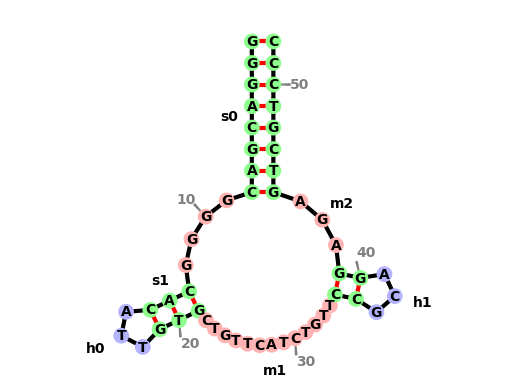

In [2]:
structs = ty_fold(df['Sequence'][0])
d_b = dot_bracket( df['Sequence'][0], structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][0])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [2]:
times = []
structures = []
for count, seq in  tqdm(enumerate(df['Sequence'])):
    start_time = time.time()
    structs = fold(seq)
    times.append(time.time()-start_time)
    structures.append(structs)
    if count == 100:
        break
'''
d_b = dot_bracket( df['Sequence'][i], structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()
'''
print(sum(times))

100it [00:31,  3.22it/s]

31.01815438270569


In [5]:
my_times = []
my_structures = []
for count, seq in  tqdm(enumerate(df['Sequence'])):
        start_time = time.time()
        structs = my_fold(seq)
        my_times.append(time.time()-start_time)
        my_structures.append(structs)
        if count == 100:
            break
print(sum(my_times))

100it [00:31,  3.14it/s]

31.765604257583618


In [3]:
'({}, {})'.format(*(1,2))

'(1, 2)'

In [ ]:
np.sum(my_times)

33.84689688682556

In [ ]:
i = 0
my_structs = my_fold( df['Sequence'][i])
myd_b = dot_bracket( df['Sequence'][i], my_structs)
bg = BulgeGraph.from_dotbracket( myd_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'int'